# SVM: Radial Kernel

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_circles
from ipywidgets import interact, fixed
from sklearn.svm import SVC

In [28]:
def plot_radial(factor, noise):
    X,Y = make_circles(100, factor=0.1, noise=0.1)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer')
    

In [29]:
interact(plot_radial, factor=[0.1, 0.3, 0.5, 0.7, 1], noise=[0.1, 0.3, 0.5, 0.7, 1])

interactive(children=(Dropdown(description='factor', options=(0.1, 0.3, 0.5, 0.7, 1), value=0.1), Dropdown(des…

<function __main__.plot_radial(factor, noise)>

In [14]:
from mpl_toolkits import mplot3d

In [20]:
r=np.exp(-(X**2).sum(1))

In [21]:
def plot_3D (elev=30, azim=30, X=X, Y=Y, r=r):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1],r,c=Y, s=50, cmap='summer')
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    ax.set_xlabel('r')

In [23]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90, -60, -30, 0, 30, 60, 90], azim=[-90, -60, -30, 0, 30, 60, 90], X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.01267061,  0.15429792],
       [-0.70005513,  0.66690982],
       [-0.75518373, -0.79530436],
       [-1.03435538, -0.47092554],
       [-1.00705959,  0.27517387],
       [ 0.08876084,  0.25235701],
       [ 0.06892401, -0.1609357 ],
       [ 0.26531836, -1.00910553],
       [-0.49560991, -0.90140343],
       [ 0.97462141,  0.2144787 ],
       [-0.07172221,  0.14499205],
       [ 0.15642188,  0.08089351],
       [-0.07043004, -0.19235026],
       [ 0.08654936, -0.91784685],
       [ 0.23829243,  0.16849635],
       [-0.15864243,  0.14861938],
       [ 0.99482628, -0.34235707],
       [ 0.79418731,  0.63653126],
       [ 1.04278161, -0.1191298 ],
       [ 1.01390114, -0.25197381],
       [-0.5430723 ,  0.7968529 ],
       [-0.2754349 , -0.00221728],
       [ 0.1700459 ,  0.05691389],
       [ 0.59786928, -1.12416361],
       [-0.01523264,  0.01573897],
       [-0.79926633, -0.47625844],
       [-0.13971175, -0.03910019],
       [

In [27]:
rbf=SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

C:\Users\Andrea\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
def plt_svc (model, ax=None, plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    xx=np.linspace(xlim[0], xlim[1],30)
    yy=np.linspace(ylim[0], ylim[1],30)
    Y,X=np.meshgrid(yy,xx)
    
    
    xy =np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    
    ax.contour(X,Y,P, colors='k', levels=[-1,0,1], linestyles=['--', '-' , '--'])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=60, linewidth=1,)
                   

[[ 0.53252572 -0.55701079]
 [-0.9506966  -0.06086582]
 [-0.14849706  0.78292142]
 [ 0.89470012  0.18244636]
 [-0.16777109 -0.77467187]
 [ 0.05248211 -0.33309334]]


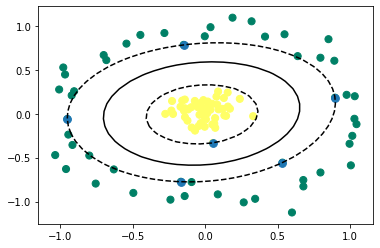

In [33]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='summer')
plt_svc(rbf)